# Large Sample Theory


## Convergence in Probability

Definition (Convergence in probability)
: A sequence ${X_n}$ of random variables converges in probability towards the random variable $X$ if for all $\varepsilon > 0$,

  $$
  \lim _{n \rightarrow \infty} \operatorname{\mathbb{P}}\left(\left|X_{n}-X\right|>\varepsilon\right)=0
  $$

In short, we write $X_{n} \stackrel{\mathcal{P}}{\rightarrow} X$ or $\operatorname{plim} X_{n}=X$.

**Properties**

1. $\operatorname{plim} \frac{X_n}{Y_n}   = \frac{\operatorname{plim} X_n }{\operatorname{plim} Y_n }$

1. $\operatorname{plim} X_nY_n  = \operatorname{plim} X_n  \operatorname{plim} Y_n$

1. $\operatorname{plim} (X_n+Y_n)  = \operatorname{plim} X_n  + \operatorname{plim} Y_n$

1. $\operatorname{plim} g(X_n)  = g(\operatorname{plim} X_n )$ if $g$ if is continuous at $\operatorname{plim} X_n$



## Law of Large Numbers

The Law of Large Numbers states that, as the number of identically distributed, randomly generated variables increases, their sample mean (average) approaches their theoretical mean.


### Weak Law of Large Numbers

Let $X_1, \ldots, X_n$ be independently and identically distributed random variables with mean $\mu$ and variance $\sigma^{2}<\infty$.
Then for every $\epsilon>0$,

$$
\lim_{n\rightarrow\infty}\operatorname{\mathbb{P}}\left(\left|\bar{X}_{n}-\mu\right|<\epsilon\right)=1
$$

i.e. the sample mean converge in probability to the theoretical mean $\mu$,

$$
\bar{X}_{n}\overset{\mathcal{P}}{\rightarrow}\mu \quad \text{as}\ n\rightarrow \infty
$$

It leaves open the possibility that $\left|\overline{X}_{n}-\mu \right|>\epsilon$  happens an **infinite** number of times,

To prove it, by Chebychev's Inequality,

$$
\operatorname{\mathbb{P}}\left(\left|\bar{X}_{n}-\mu\right|\geq\epsilon\right)
=\operatorname{\mathbb{P}}\left(\left(\bar{X}_{n}-\mu\right)^{2}\geq\epsilon^{2}\right)
\leq\frac{\operatorname{\mathbb{E}}\left(\bar{X}_{n}-\mu\right)^{2}}{\epsilon^{2}}
=\frac{\operatorname{Var}\bar{X}_{\mathfrak{H}}}{\epsilon^{2}}=\frac{\sigma^{2}}{n\epsilon^{2}} \rightarrow 0
$$



### Strong Law of Large Numbers

Let $X_1, \ldots, X_n$ be independently and identically distributed random variables with mean $\mu$ and variance $\sigma^{2}<\infty$.
Then for every $\epsilon>0$,

$$
\operatorname{\mathbb{P}}\left(\lim_{n\rightarrow\infty}\left|\bar{X}_{n}-\mu\right|<\epsilon\right)=1
$$

i.e. the sample mean converge to the theoretical mean $\mu$ almost surely,

$$
\bar{X}_{n}\overset{a.s.}{\rightarrow}\mu \quad \text{as} \ n\rightarrow \infty
$$

```{note}
- Converge almost surely is a stronger condition than converge in probability.
- In some cases, the strong law does not hold, but the weak law does.
```

(CLT)=
## Central Limit Theorem

The Central Limit Theorem, in probability theory, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed.

There are many versions of CLT with various problem settings. Here we introduce Lindeberg–Lévy CLT.

Let $X_1, \ldots, X_n$ be a sequence of independently and identically distributed random variables such that
$\operatorname{\mathbb{E}}\left( X_{i} \right)=\mu$, $\mathrm{Var}\left( X_{i} \right)=\sigma^{2}>0$. Let $G_{n}(x)$ denote
the CDF of $\frac{\sqrt{n}\left(\bar{X}_{n}-\mu\right)}{\sigma}$,
then

$$
\lim_{n\rightarrow\infty}G_{n}(x)=\Phi(x)
$$

i.e., the normalized sample mean converge in distribution to a standard normal random variable,


$$
\frac{\sqrt{n}\left(\bar{X}_{n}-\mu\right)}{\sigma}\overset{\mathcal{D}}{\rightarrow} \mathcal{N}(0,1)
$$

The Central Limit Theorem implies that we can obtain a normal distribution from a uniform random variable generator. Let  $X\sim \mathcal{U}(0,1)$, then $\mu = \operatorname{\mathbb{E}}\left( X \right) =\frac{1}{2}$, $\sigma = \sqrt{\mathrm{Var}\left(X \right)} = \sqrt{\frac{1}{12}}$. Hence,

$$
Y_n=\frac{\sqrt{n}\left(\bar{X}_{n}-\mu\right)}{\sigma}\overset{\mathcal{D}}{\rightarrow}\mathcal{N}(0,1)
$$

Implementation with Python:

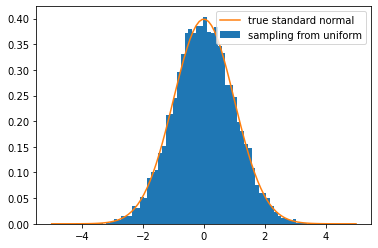

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

n = 10000 # sample size
m = 10000 # number of samples
means = np.random.rand(m, n).mean(axis=1)
std_means = np.sqrt(n) * (means - 0.5) / np.sqrt(1/12)

points = np.linspace(-5, 5, 100)
true = norm.pdf(points)

plt.hist(std_means, bins='auto', density=True, label='sampling from uniform')
plt.plot(points, true, label='true standard normal')
plt.legend()
plt.show()

In general, one can then sample from any normal distribution $\mathcal{N}(a,b^2)$ by the transformation $Z = bY_n+a$.

In multivariate case, when $n-p$ is large, approximately,


$$
\sqrt{n}\left(\bar{\boldsymbol{x}}-\boldsymbol{\mu} \right)\overset{\mathcal{D}}{\rightarrow} \mathcal{N}(\boldsymbol{0},\boldsymbol{\Sigma})
$$

## Eigen Analysis of Covariance Matrix

Assume that $\boldsymbol{x}_i \overset{\text{iid}}{\sim}\mathcal{N} _p(\boldsymbol{\mu} , \boldsymbol{\Sigma} )$, let $(\lambda_i, \boldsymbol{u} _i)$ and $(\hat{\lambda}_i, \hat{\boldsymbol{u}} _i)$ be respectively the eigen pair of population covariance matrix $\boldsymbol{\Sigma}$ and of sample covariance matrix $\boldsymbol{S}$. Let $d_i = \sqrt{n-1} (\hat{\lambda}_i - \lambda_i)$ be a difference measure between the two eigenvalues, and $\boldsymbol{z} _i = \sqrt{n-1}(\hat{\boldsymbol{u}} _i - \boldsymbol{u} _i)$ be a difference measure between the two eigenvectors, then we have the following asymptotic results as $(n - 1 - p) \rightarrow \infty$,
- $[d_1, \ldots, d_p]$ is independent of $[\boldsymbol{z} _1, \ldots, \boldsymbol{z} _p]$
- $d_i$'s are independently $\mathcal{N} (0, 2\lambda_i^2)$.
- $\boldsymbol{z} _i \sim \mathcal{N} _p(\boldsymbol{0} , \sum_{k=1 \atop k \neq i}^{p} \frac{\lambda_{i} \lambda_{k}}{\left(\lambda_{i}-\lambda_{k}\right)^{2}} \boldsymbol{u}_{k} \boldsymbol{u}_{k}^{\top})$ and $\operatorname{Cov}\left(\boldsymbol{z}_{i}, \boldsymbol{z}_{j}\right)=-\frac{\lambda_{i} \lambda_{j}}{\left(\lambda_{i}-\lambda_{j}\right)^{2}} \boldsymbol{u}_{j} \boldsymbol{u}_{i}^{\top}$

(large-sample-inequalities)=
## Inequalities

### Chernoff Bound

Chernoff bound gives bounds of the sum of $n$ random variables over $[0,1]$ (not necessarily independent).

Suppose $X_{1}, \cdots, X_{n}$ are independent random variables with $X_{i} \in[0,1]$. Let $S=\sum_{i} X_{i}$ and $\mu=\mathbb{E}[S]$ be the expected sum. Then for $\lambda \in (0,1)$,

$$
\operatorname{\mathbb{P}} \left[ S>(1+\lambda) \mu \right]<e^{-\frac{\lambda^{2} \mu}{3}} \qquad \text{(upper tail)}
$$

and,

$$
\operatorname{\mathbb{P}} \left[ S<(1-\lambda) \mu  \right]<e^{-\frac{\lambda^{2} \mu}{2}} \qquad \text{(lower tail)}
$$

Together:

$$\begin{aligned}
\mathbb{P}(|S-\mu |>\lambda \mu)
& \leq 2 e^{-\lambda^{2} \mu / 3}\\
\end{aligned}$$


(bernstein-inequality)=
### Bernstein Inequality

#### Univariate Case

Let $X_1, X_2, \ldots, X_n \in \mathbb{R}$ be i.i.d. random variables with mean 0 and value $\left\vert X_i \right\vert \le L$. Let their sum be $S = \sum_{i=1}^n X_i$. Then

$$
\mathbb{P} (\left\vert S \right\vert \ge t)  \le 2 \exp \left( \frac{- t^2}{\operatorname{Var}\left( S \right) + L t /3}  \right)
$$

If $n$ is large, since $\operatorname{Var}\left( S \right) = n \sigma^2$, the bound becomes

$$
2 \exp \left( \frac{- t^2}{\operatorname{Var}\left( S \right) + L t /3}  \right) \rightarrow 2 \exp \left( \frac{- t^2}{n \sigma^2}  \right)
$$

Let $t = \sqrt{n \log n} \cdot \sigma$, then we have

$$
\mathbb{P} (\left\vert S \right\vert \ge t)  \le \frac{2}{n}
$$

In other words, w.h.p., we have $\frac{1}{n} \left\vert S \right\vert \le \sqrt{\frac{\log n}{n}} \sigma$.

The term $Lt/3$ takes into account that each r.v. could be non-Gaussian like.

#### Random Matrices Case

[Reference](https://arxiv.org/pdf/1501.01571.pdf)

Let $\boldsymbol{X}_1, \boldsymbol{X}_2, \ldots, \boldsymbol{X}_n \in \mathbb{R} ^ {d_1 \times d_2}$ be i.i.d. random matrices with mean 0 and spectral norm $\left\| \boldsymbol{X} _i \right\|  \le L$. Let their sum be $\boldsymbol{S} = \sum_{i=1}^n \boldsymbol{X}_i$ and define the 'variance' as

$$\begin{aligned}
\operatorname{Var}\left( \boldsymbol{S} \right)
&= \max \left\{ \left\| \mathbb{E} [\boldsymbol{S} \boldsymbol{S} ^{\top} ]  \right\|, \left\| \mathbb{E} [\boldsymbol{S} ^{\top} \boldsymbol{S} ]  \right\|   \right\}\\
&= \max \left\{ \left\| \sum_{i=1}^n \mathbb{E} [\boldsymbol{X}_i \boldsymbol{X}_i ^{\top} ]  \right\|, \left\| \sum_{i=1}^n \mathbb{E} [\boldsymbol{X}_i ^{\top} \boldsymbol{X}_i ]  \right\|   \right\}\\
\end{aligned}$$

Then

$$
\mathbb{P} (\left\vert \boldsymbol{S}  \right\vert \ge t)  \le (d_1 + d_2) \exp \left( \frac{- t^2}{\operatorname{Var}\left( \boldsymbol{S} \right) + L t /3}  \right)
$$

(hoeffding-inequality)=
### Hoeffding’s Inequality

Let $Z_i, \ldots, Z_n$ be independent bounded random variables with $Z_i \in [a, b]$ for all $i$. Then

$$
\mathbb{P}\left(\frac{1}{n} \sum_{i=1}^{n}\left(Z_{i}-\mathbb{E}\left[Z_{i}\right]\right) \geq t\right) \leq \exp \left(-\frac{2 n t^{2}}{(b-a)^{2}}\right)
$$

and

$$
\mathbb{P}\left(\frac{1}{n} \sum_{i=1}^{n}\left(Z_{i}-\mathbb{E}\left[Z_{i}\right]\right) \leq - t\right) \leq \exp \left(-\frac{2 n t^{2}}{(b-a)^{2}}\right)
$$

for all $t$.